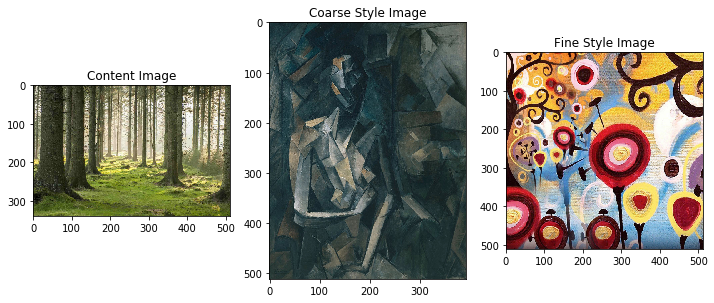

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

from util import imshow, load_img, save_img, upscale, apply_lum, match_lum, match_color_histogram
from transfer import transfer_style, merge_styles

# load input images
coarse_style_path = tf.keras.utils.get_file('picasso.jpg','file:///home/jupyter/pictures/picasso.jpg')
fine_style_path = tf.keras.utils.get_file('candy.jpg','file:///home/jupyter/pictures/candy.jpg')
content_path = tf.keras.utils.get_file('forest.jpg','file:///home/jupyter/pictures/forest.jpg')

content_img = load_img(content_path, max_dim=512)
coarse_style_img = load_img(coarse_style_path, max_dim=512)
fine_style_img = load_img(fine_style_path, max_dim=512)

plt.subplot(1, 3, 1)
imshow(content_img, 'Content Image')

plt.subplot(1, 3, 2)
imshow(coarse_style_img, 'Coarse Style Image')

plt.subplot(1, 3, 3)
imshow(fine_style_img, 'Fine Style Image')

plt.show()

W0719 12:07:57.786331 139730725451520 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0719 12:07:57.809656 139730725451520 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


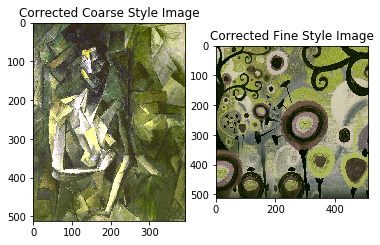

In [2]:
coarse_style_img = match_color_histogram(content_img, coarse_style_img)
fine_style_img = match_color_histogram(content_img, fine_style_img)

plt.subplot(1, 2, 1)
imshow(coarse_style_img, 'Corrected Coarse Style Image')

plt.subplot(1, 2, 2)
imshow(fine_style_img, 'Corrected Fine Style Image')

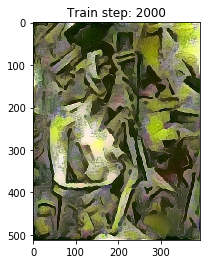

Total time: 81.3


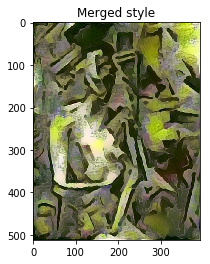

In [3]:
# Run the style transfer for merging styles (fine details of the first style will replace the fine details of the second style)
merged_style = merge_styles(coarse_style_img, fine_style_img, beta=1e0, total_variation_weight=1e8, epochs=20)
imshow(merged_style, 'Merged style')
save_img(merged_style[0], 'merged-style.png')

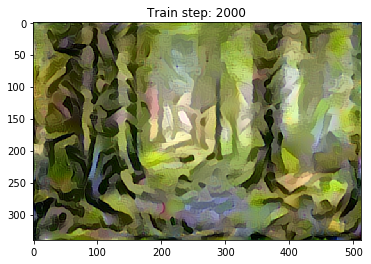

Total time: 71.2


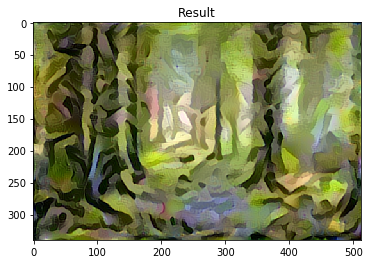

In [4]:
# Use the merged style for regular style transfer
transferred = transfer_style(content_img, merged_style, alpha=1e1, beta=1e-2, total_variation_weight=1e8, style_weights = [1.0, 1.0, 1.0, 1.0, 1.0], epochs=20)
imshow(transferred, 'Result')
save_img(transferred[0], 'output.png')

W0719 12:10:34.280992 139730725451520 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0719 12:10:34.287950 139730725451520 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


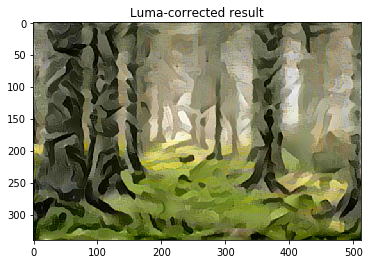

In [5]:
# Apply the original image luma
luma_transferred = apply_lum(content_img, transferred)
imshow(luma_transferred, 'Luma-corrected result')
save_img(luma_transferred[0], 'output-luma.png')